# 보스턴 집값

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### 데이터 설명
- crim: 범죄율
- zn: 25,000평방피트를 초과 거주지역 비율
- indus: 비소매상업지역 면적 비율
- chas: 찰스강의 경계에 위치한 경우는 1, 아니면 0(범주형 변수)
- nox: 일산화질소 농도
- rm: 주택당 방 수
- age: 1940년 이전에 건축된 주택의 비율
- dis: 직업센터의 거리
- rad: 방사형 고속도로까지의 거리
- tax: 재산세율
- ptratio: 학생/교사 비율
- b: 인구 중 흑인 비율
- lstat: 인구 중 하위 계층 비율
- medv: 보스턴 506개 타운의 1978년 주택 가격 중앙값(단위 1,000달러)

## feature selection
- 공분산과 상관계수를 이용하여 변수 선택

### 가설1. 범죄율이 높은 곳의 집 값은 낮을까?

In [3]:
# 공분산과 상관계수는 연속형 자료를 분석하기 때문에 범주형 변수는 제거

del data['chas']

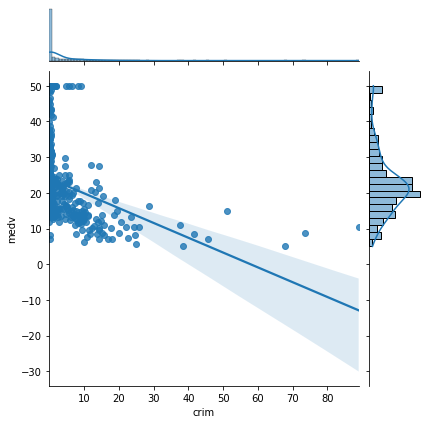

In [4]:
# 범죄율과 집값의 상관관계가 있는지 그래프로 확인

sns.jointplot(data = data, x = 'crim', y = 'medv', kind = 'reg')

#### x.cov(y)

- 공분산을 확인하기 위한 함수
- x와 y에 같은 시리즈형의 데이터를 대입
- df.cov()처럼 데이터프레임을 x에 넣고 y자리에 아무것도 적지 않으면 각 변수별로 공분산을 계산해 줌

In [5]:
# 범죄율과 집값의 공분산 확인

data['crim'].cov(data['medv'])

-30.718507964458183

#### x.corr(y)

- 상관계수를 확인하기 위한 함수
- x와 y에 같은 시리즈형의 데이터를 대입
- df.corr()처럼 데이터프레임을 x에 넣고 y자리에 아무것도 적지 않으면 각 변수별로 상관계수를 계산해 줌

In [6]:
# 범죄율과 집값의 상관계수 확인

data['crim'].corr(data['medv'])

-0.38830460858681165

- 강한 음의 상관관계
- 따라서 범죄율이 높은 곳의 집값이 낮음을 확인할 수 있음

### 가설2. 방의 개수가 많은 곳이 집값이 비쌀까?

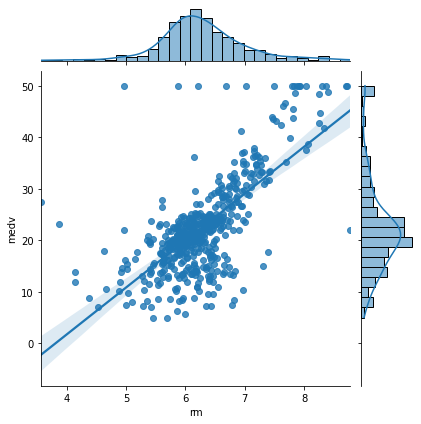

In [7]:
sns.jointplot(data = data, x = 'rm', y = 'medv', kind = 'reg')

In [8]:
# 공분산

data['rm'].cov(data['medv'])

4.493445879544476

In [9]:
# 상관계수

data['rm'].corr(data['medv'])

0.6953599470715394

- 강한 양의 상관관계
- 방의 개수가 많은 곳이 집값도 비쌈

#### sns.heatmap(df, cmap, annot, fmt)

- cmap = 전체적인 색을 지정(summer/YlGnBu/RdYlGn_r 등)
- annot = True/False로써 숫자를 표현해 줄 것인지
- fmt = 숫자의 소숫점 자리수 설정

#### plt.figure(figsize = (가로, 세로))

- 그래프의 크기 설정

<AxesSubplot:>

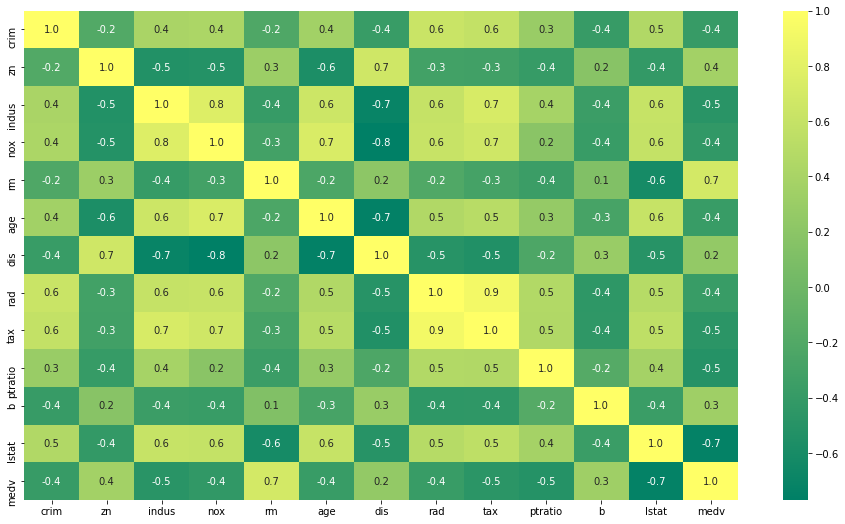

In [10]:
plt.figure(figsize = (16, 9))
sns.heatmap(data.corr(), cmap = 'summer', annot = True, fmt = '.1f')

## feature extraction

- PCA를 이용하여 새로운 변수 생성

In [11]:
data.columns

Index(['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [12]:
# 변수들의 상관계수를 확인하고 몇 개의 변수를 몇 개로 줄일 것인지 결정

corr_bar = []

for column in data.columns:
    print(f'{column}과 medv의 상관관계 : {data[column].corr(data["medv"])}')
    corr_bar.append(data[column].corr(data['medv']))

crim과 medv의 상관관계 : -0.38830460858681165
zn과 medv의 상관관계 : 0.3604453424505432
indus과 medv의 상관관계 : -0.4837251600283728
nox과 medv의 상관관계 : -0.42732077237328264
rm과 medv의 상관관계 : 0.6953599470715394
age과 medv의 상관관계 : -0.37695456500459634
dis과 medv의 상관관계 : 0.24992873408590394
rad과 medv의 상관관계 : -0.381626230639778
tax과 medv의 상관관계 : -0.4685359335677669
ptratio과 medv의 상관관계 : -0.5077866855375622
b과 medv의 상관관계 : 0.3334608196570664
lstat과 medv의 상관관계 : -0.737662726174015
medv과 medv의 상관관계 : 1.0


- 위 코드 오류났던 이유: 한 문장 안에 ''를 썼을 땐 그 안에 또 ''를 쓰면 안되고 ""로 대체해야 함

C:\Users\psuny\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

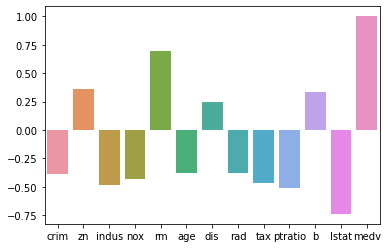

In [13]:
sns.barplot(data.columns, corr_bar)

- 보기 불편하므로 corr_bar를 abs로 바꾼 다음 다시 그래프를 그리면 다음과 같음

In [17]:
corr_bar = []
for column in data.columns:
    corr_bar.append(abs(data[column].corr(data['medv'])))

C:\Users\psuny\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

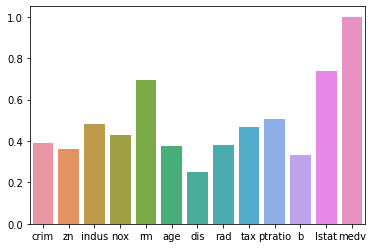

In [18]:
sns.barplot(data.columns, corr_bar)

In [20]:
# 수치형데이터 중 상관계수가 가장 낮은 두 개의 변수 선택

x = data[['dis', 'b']]
x

,dis,b
0,4.0900,396.90
1,4.9671,396.90
2,4.9671,392.83
3,6.0622,394.63
4,6.0622,396.90
...,...,...
501,2.4786,391.99
502,2.2875,396.90
503,2.1675,396.90
504,2.3889,393.45


In [21]:
# PCA를 위한 라이브러리

from sklearn.decomposition import PCA

- PCA(n_components)
    - n_components: 몇가지의 변수를 만들지 개수를 정함
    - 객체를 생성하는 개념
    

- PCA.fit(x)
    - x의 데이터를 학습시킴으로써 앞에서 생성한 객체가 데이터를 공부하는 개념
    

- PCA.components_
    - 앞서 학습한 내용을 바탕으로 만들어진 변수 속에 담긴 이 전 변수의 분산이 담긴 정도
    

- PCA.explained_variance_ratio_
    - 새로운 변수가 설명하는 분산의 비율
    

- PCA.transform
    - 학습한 내용을 바탕으로 만들어진 학습기로 x의 데이터를 변환

In [22]:
# 2개의 변수를 조합하여 1개의 변수를 만듦

pca = PCA(n_components = 1)

In [23]:
# 데이터 학습

pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [24]:
# 새로운 변수에 담긴 각 변수의 분산 확인

pca.components_

array([[-0.00672682, -0.99997737]])

In [25]:
# 새로운 변수 PC1이 설명하는 분산의 비율

pca.explained_variance_ratio_

array([0.9995135])

In [26]:
# 새로운 변수를 pc1이라는 칼럼에 추가

data['pc1'] = pca.transform(x)
data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,pc1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,-40.227042
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,-40.232942
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,-36.163035
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,-37.970360
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,-40.240309


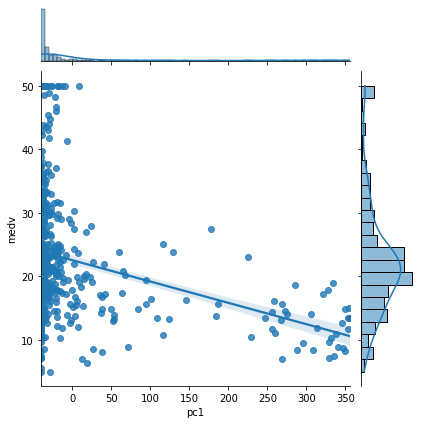

In [27]:
# 새로운 변수와 집값의 상관관계 그래프

sns.jointplot(data = data, x = 'pc1', y = 'medv', kind = 'reg')

In [28]:
# 상관계수

data['pc1'].corr(data['medv'])

-0.33348451067418966

#### 정규화

- StandardScaler() : 정규화 객체 생성
- scaler.fit(x) : 정규화 객체로 학습
- scaler.transform(x) : 학습된 학습기로 변수 x의 데이터를 변환

In [29]:
# 정규화에 필요한 라이브러리

from sklearn.preprocessing import StandardScaler

In [30]:
# 정규화 객체 생성

scaler = StandardScaler()

In [31]:
# x를 학습 시킨 후 변형하여 정규화된 x로 만듦

scaler.fit(x)
scaler_x = scaler.transform(x)
scaler_x

array([[ 0.1402136 ,  0.44105193],
       [ 0.55715988,  0.44105193],
       [ 0.55715988,  0.39642699],
       ...,
       [-0.77368357,  0.44105193],
       [-0.66843684,  0.4032249 ],
       [-0.61324648,  0.44105193]])

In [32]:
# PCA의 개수

pca = PCA(n_components = 1)

# 데이터 학습

pca.fit(scaler_x)

# 새로운 변수에 담긴 각 변수의 분산 확인 => 위의 결과와 분산의 정도가 달라짐

pca.components_

array([[-0.70710678, -0.70710678]])

- 위 결과에서는 두 값이 차이가 크게 났는데 정규화를 통해 비슷해짐

In [33]:
# 새로운 변수 PC1이 설명하는 분산의 비율

pca.explained_variance_ratio_

array([0.64575584])

In [34]:
# pc1칼럼 생성

data['pc1'] = pca.transform(scaler_x)
data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,pc1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,-0.411017
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,-0.705842
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,-0.674288
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,-1.056346
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,-1.073946


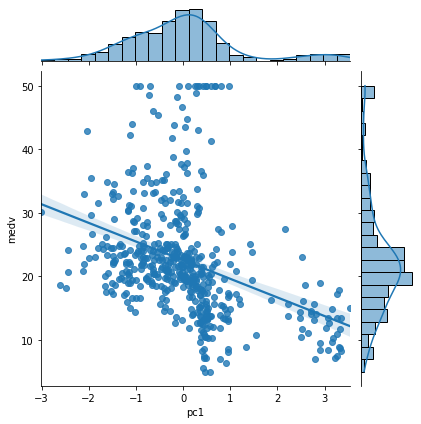

In [35]:
sns.jointplot(data = data, x = 'pc1', y = 'medv', kind = 'reg')

In [36]:
data['pc1'].corr(data['medv'])

-0.362989851000902

- 정규화하기 전보다 상관성이 더 높아짐

# 다시 데이터 불러오기

In [38]:
data = pd.read_csv('./boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 군집화

- 군집화를 통해 비슷한 성향을 가진 그룹 찾기

In [39]:
# 범주형 데이터 제거

del data['chas']

In [40]:
# medv 칼럼도 복사 후 제거

medv = data['medv']
del data['medv']

In [41]:
# 군집화를 진행하기에 앞서 수월한 시각화와 설명력을 위해 PCA를 이용해 변수를 2개로 압축

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [42]:
# 정규화 진행
# 객체 생성

scaler = StandardScaler()

In [43]:
# 데이터 학습

scaler.fit(data)

# 변환

scaler_data = scaler.transform(data)

In [44]:
# 객체 생성

pca = PCA(n_components = 2)

In [45]:
# PCA 학습

pca.fit(scaler_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [46]:
# 결과값 확인

pca.transform(scaler_data)

array([[-2.09723388, -0.72017904],
       [-1.456003  , -0.94769427],
       [-2.07345404, -0.62533575],
       ...,
       [-0.31128314, -1.39524641],
       [-0.26939083, -1.35059004],
       [-0.12452556, -1.34293829]])

In [47]:
# 데이터 프레임 형태로 변환

data2 = pd.DataFrame(data = pca.transform(scaler_data), columns = ['pc1', 'pc2'])
data2.head()

,pc1,pc2
0,-2.097234,-0.720179
1,-1.456003,-0.947694
2,-2.073454,-0.625336
3,-2.610161,-0.134044
4,-2.456866,-0.229919


## 군집화 갯수 정하기

- KMeans(n_cluster = k)
    - k개의 군집화를 하겠다는 객체 생성
    

- Kmeans.fit()
    - 학습시키기
    

- KMeans.inertia_
    - 학습된 KMeans의 응집도를 확인
    - 응집도란 각 데이터로부터 자신이 속한 군집의 중심까지의 거리를 의미
    - 즉, 낮을수록 군집화가 더 잘되어 있음
    

- KMeans.predict(data)
    - 학습된 데이터를 바탕으로 데이터를 변환시켜 줌

In [48]:
from sklearn.cluster import KMeans

In [49]:
x = []     # k가 몇개인지
y = []     # 응집도가 몇인지

for k in range(1, 30):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data2)
    
    x.append(k)
    y.append(kmeans.inertia_)

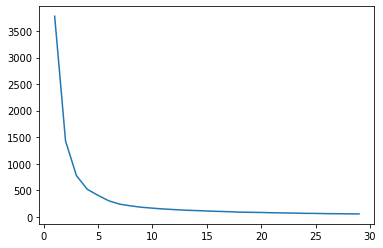

In [50]:
plt.plot(x, y)

#### elbow point 4로 지정 후 클러스터링 시작

In [52]:
kmeans = KMeans(n_clusters = 4)

In [53]:
kmeans.fit(data2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
data2['labels'] = kmeans.predict(data2)

In [55]:
data2.head()

,pc1,pc2,labels
0,-2.097234,-0.720179,2
1,-1.456003,-0.947694,2
2,-2.073454,-0.625336,2
3,-2.610161,-0.134044,2
4,-2.456866,-0.229919,2


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

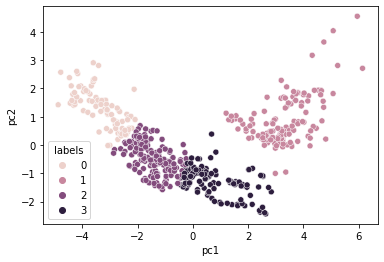

In [56]:
sns.scatterplot(x = 'pc1', y = 'pc2', hue = 'labels', data = data2)

#### 클러스터링 결과 해석

- 어떤 그룹의 집값이 높은지 평균 비교

In [57]:
# medv 칼럼 다시 추가

data2['medv'] = medv

In [58]:
data2.head()

,pc1,pc2,labels,medv
0,-2.097234,-0.720179,2,24.0
1,-1.456003,-0.947694,2,21.6
2,-2.073454,-0.625336,2,34.7
3,-2.610161,-0.134044,2,33.4
4,-2.456866,-0.229919,2,36.2


In [59]:
# 시각화를 위해 각 그룹별 medv값을 따로 변수로 생성

medv_0 = data2[data2['labels'] == 0]['medv'].mean()
medv_1 = data2[data2['labels'] == 1]['medv'].mean()
medv_2 = data2[data2['labels'] == 2]['medv'].mean()
medv_3 = data2[data2['labels'] == 3]['medv'].mean()

<AxesSubplot:>

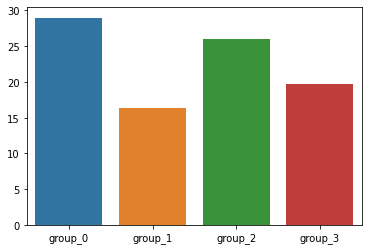

In [60]:
sns.barplot(x = ['group_0', 'group_1', 'group_2', 'group_3'], y = [medv_0, medv_1, medv_2, medv_3])

#### 그룹의 특징 확인

- 최상위 그룹(0번 그룹)과 최하위 그룹(1번 그룹)의 특징을 살펴보며 집값이 높은 이유 혹은 낮은 이유에 대해 고찰

In [61]:
# 원본 데이터에 라벨을 복제

data['labels'] = data2['labels']

In [62]:
# 0번 그룹과 1번 그룹의 데이터를 group으로 저장

group = data[(data['labels'] == 0) | (data['labels'] == 1)]
group.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,labels
39,0.02763,75.0,2.95,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32,0
40,0.03359,75.0,2.95,0.428,7.024,15.8,5.4011,3.0,252.0,18.3,395.62,1.98,0
41,0.12744,0.0,6.91,0.448,6.770,2.9,5.7209,3.0,233.0,17.9,385.41,4.84,0
52,0.05360,21.0,5.64,0.439,6.511,21.1,6.8147,4.0,243.0,16.8,396.90,5.28,0
53,0.04981,21.0,5.64,0.439,5.998,21.4,6.8147,4.0,243.0,16.8,396.90,8.43,0


In [63]:
group = group.groupby('labels').mean().reset_index()
group

,labels,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0,0.065127,54.1875,3.750909,0.423147,6.722830,29.660227,6.91729,4.159091,305.420455,16.982955,389.006818,6.153409
1,1,12.571770,0.0000,18.243881,0.671470,6.010679,89.929851,2.05719,23.701493,666.671642,20.198507,288.733209,18.723358


#### 시각화를 위한 subplot

- plt.subplots(행, 열, figsize = ())

In [64]:
column = group.columns
column

Index(['labels', 'crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'b', 'lstat'],
      dtype='object')

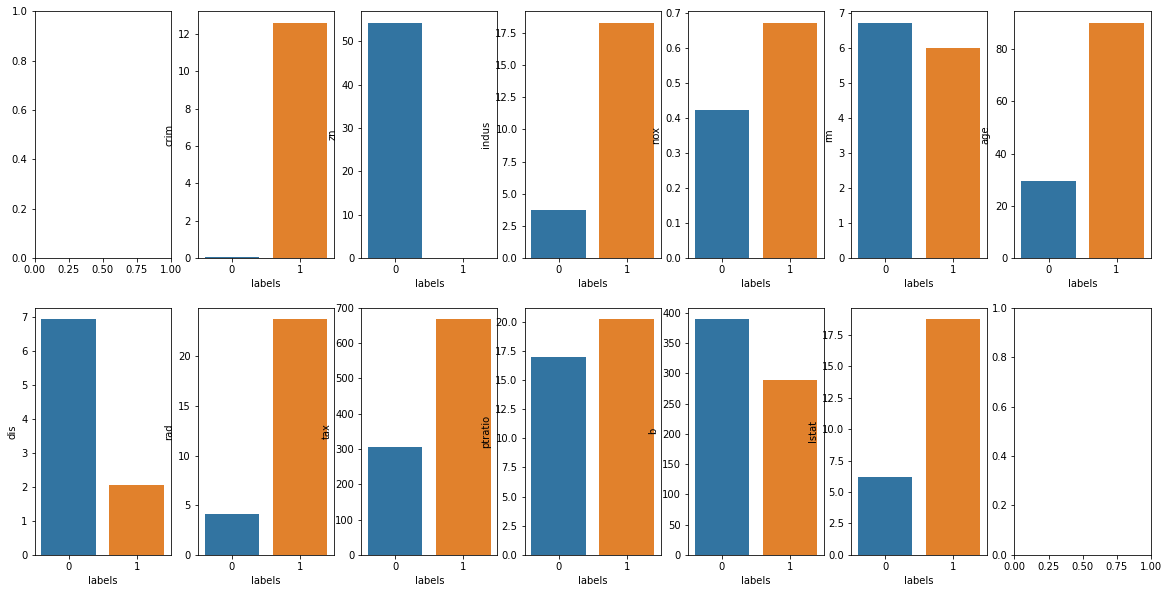

In [73]:
f, ax = plt.subplots(2, 7, figsize = (20, 10))

for i in range(1, 13):
    sns.barplot(x = 'labels', y = column[i], data = group, ax = ax[i // 7, i % 7])

# 결론

- 위 그래프를 보면 범죄율이 낮을수록, 25,000평방피트를 초과 거주지역 비율이 높을수록 집값이 비쌈을 알 수 있음